an MDP involves an agent and a decision-making process.

in this session we develop an MDP and calculating the value function under the `optimal policy`.

the optimal policy, in this case, is
choosing a0 work for each step

## import libraries

In [1]:
import torch
import matplotlib.pyplot as plt

#### transition matrix, T(s, a, s'), consisting of the probabilities of state s transitioning to state s' with action a.
##### s0 (study) and s1 (sleep) and s2 (play)
##### a0 work and a1 slack

In [2]:
T = torch.tensor([ 
                   [[0.8, 0.1, 0.1],
                    [0.1, 0.6, 0.3]]
                  ,[[0.7, 0.2, 0.1],
                    [0.1, 0.2, 0.1]]
                  ,[[0.6, 0.2, 0.2],
                    [0.1, 0.4, 0.5]]
                  ])

In [3]:
R = torch.tensor([1., 0, -1.]) #reward
gamma = 0.5
policy_optimal = torch.tensor([[1.0, 0.0],[1.0, 0.0],[1.0, 0.0]])
threshold = 0.0001

In [4]:
def policy_evaluation(policy, trans_matrix, rewards, gamma, threshold):
  """
    Perform policy evaluation
    @param policy: policy matrix containing actions and their
    probability in each state
    @param trans_matrix: transformation matrix
    @param rewards: rewards for each state
    @param gamma: discount factor
    @param threshold: the evaluation will stop once values
    for all states are less than the threshold
    @return: values of the given policy for all possible states
  """
  n_state = policy.shape[0]
  V = torch.zeros(n_state)
  V_his = [V]
  while True:
    V_temp = torch.zeros(n_state)
    for state, actions in enumerate(policy):
      for action, action_prob in enumerate(actions):
        V_temp[state] += action_prob * (R[state] + gamma * torch.dot(trans_matrix[state, action], V))
    max_delta = torch.max(torch.abs(V - V_temp))
    V = V_temp.clone()
    V_his.append(V)
    if max_delta <= threshold:
      break
  return V, V_his

In [5]:
V, vHistory = policy_evaluation(policy_optimal, T, R, gamma, threshold)
print("The value function under the optimal policy is:\n{}".format(V))

The value function under the optimal policy is:
tensor([ 1.6786,  0.6260, -0.4821])


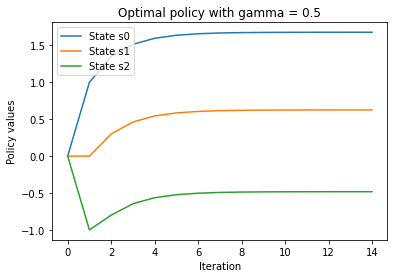

In [6]:
s0, = plt.plot([v[0] for v in vHistory])
s1, = plt.plot([v[1] for v in vHistory])
s2, = plt.plot([v[2] for v in vHistory])
plt.title('Optimal policy with gamma = {}'.format(str(gamma)))
plt.xlabel('Iteration')
plt.ylabel('Policy values')
plt.legend([s0, s1, s2],["State s0","State s1","State s2"], loc="upper left")
plt.show()